Copyright (c) 2017-2018 [Serpent-Tools developer team](https://github.com/CORE-GATECH-GROUP/serpent-tools/graphs/contributors), GTRC

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# FissionMatrixReader

## Basic Operation
This notebook details how to utilize the [`serpentTools`](https://github.com/CORE-GATECH-GROUP/serpent-tools) package for reading fission matrix files, `[input]_fmtx[N].m` produced by SERPENT [1]. 
The fission matrix can be defined using the fmtx card on a Cartesian mesh, as explained in the [ SERPENT user forum ](https://goo.gl/r3T2Cp). The syntax is:

set fmtx 4 < xmin>  < xmax> < nx> < ymin> < ymax> < ny> < zmin> < zmax> < nz>

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import serpentTools

In [93]:
# Initialize class instance and read file
filePath = 'ref_fmtx0.m'
r = serpentTools.read(filePath)

## Obtain Fission Matrix and Uncertainties

Obtain Fission Matrix:

In [94]:
FissMtx = r.fMat
print(FissMtx)

[[  1.03565000e+00   2.25556000e-01   1.31814000e-03   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.21141000e-01   1.06634000e+00   1.73144000e-01   1.01131000e-03
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  7.90319000e-04   1.34305000e-01   1.06641000e+00   1.60297000e-01
    9.41014000e-04   9.57339000e-06   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  8.59638000e-06   8.44001000e-04   1.40774000e-01   1.06641000e+00
    1.53712000e-01   9.11945000e-04   1.13159000e-05   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00202000e-05   8.69914000e-04   1.45725000e-01
    1.06611000e+00   1.49256000e-01   8.79727000e-04   1.01589000e-05
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   9.41223000e-06   8.82379000e-04
    1.49646000e-01   1.06616000e+00   1.45135

Same procedure for uncertainty matrix

In [95]:
FissMtxUnc = r.fMatU
print(FissMtxUnc)

[[ 0.00045615  0.00121818  0.0181398   0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.00115886  0.00028015  0.00092341  0.0120657   0.          0.          0.
   0.          0.          0.        ]
 [ 0.0111279   0.00092806  0.00021495  0.0008004   0.00898881  0.0942335
   0.          0.          0.          0.        ]
 [ 0.0926119   0.00943784  0.00073553  0.0001915   0.00071406  0.00910074
   0.0827339   0.          0.          0.        ]
 [ 0.          0.0832101   0.00908811  0.00067972  0.00018045  0.00064569
   0.00835152  0.0787173   0.          0.        ]
 [ 0.          0.          0.0783537   0.00883504  0.0007079   0.00019116
   0.0006979   0.00865997  0.0889029   0.        ]
 [ 0.          0.          0.          0.0857217   0.00931878  0.00076019
   0.00018609  0.00075122  0.00942279  0.0849569 ]
 [ 0.          0.          0.          0.          0.0935977   0.00862418
   0.00078246  0.00021536  0.00083853  0.0106983 ]
 [ 0.          0.

## Dominant Eigen-Pair Calculation

One line is sufficient to compute the dominant eigenpair, i.e. k-eff and the asymptical fission source distribution:

In [96]:
[keff, powDis] = r.fMatEig()
print('keff = ', keff)
print('Fission Source Distribution:')
print(powDis)

keff =  1.35692329863
Fission Source Distribution:
[ 0.06442703  0.09114091  0.10720017  0.11688294  0.12149769  0.12128671
  0.11634971  0.10651745  0.09056153  0.06413586]


## Spectrum and Higher Modes Calculation

The spectrum of the matrix is stored in the array:

In [97]:
# Spectrum
r.eigValVec

array([ 1.3569233 ,  1.32347351,  1.26546606,  1.18854703,  1.10034521,
        1.00966372,  0.92478466,  0.77583612,  0.802674  ,  0.85374639])

The modes constitute the column vector of the matrix:

In [98]:
# Eigenmodes
r.eigVecMat

array([[ 0.06442703,  0.10374802, -0.13267992,  0.15329651, -0.16542129,
         0.16962206,  0.16478371, -0.08296942,  0.12684499, -0.15106176],
       [ 0.09114091,  0.13167328, -0.134821  ,  0.1041082 , -0.04806606,
        -0.01888286, -0.08070255,  0.0961785 , -0.13167347,  0.12208327],
       [ 0.10720017,  0.12245954, -0.06242939, -0.03311462,  0.10592386,
        -0.11281376, -0.0499626 , -0.10395612,  0.11220491, -0.04395206],
       [ 0.11688294,  0.08537582,  0.03547724, -0.11286401,  0.06399909,
         0.05443456,  0.11127932,  0.1089194 , -0.0750707 , -0.04381804],
       [ 0.12149769,  0.03009348,  0.10324889, -0.06029852, -0.08212219,
         0.08381825, -0.05601428, -0.11187543,  0.02661071,  0.10080784],
       [ 0.12128671, -0.03166725,  0.10343445,  0.06024505, -0.08232174,
        -0.08387159, -0.05596833,  0.11247933,  0.02611663, -0.10066029],
       [ 0.11634971, -0.08694627,  0.03575694,  0.11346656,  0.06424877,
        -0.05478   ,  0.11190442, -0.11093412

The dominant eigenvalue, the dominant eigenmode, and the dominance ratio can be accessed with the following shortcuts:

In [99]:
# Dominant eigenvalue
keff = r.domEigVal
print('keff = ', keff)
# Dominant eigenmode
powSource = r.domEigVec
print('Fission Source Distribution:')
print(powSource)
# Dominance ratio
domRatio = r.domRatio
print('Dominance Ratio:',domRatio)

keff =  1.35692329863
Fission Source Distribution:
[ 0.06442703  0.09114091  0.10720017  0.11688294  0.12149769  0.12128671
  0.11634971  0.10651745  0.09056153  0.06413586]
Dominance Ratio: 0.9753487992


## Plotting Routines

Simple 1D and 2D routines were implemented to plot the sparsity patterns of the matrices, the matrix spectrum, and the eigenmodes spatial distribution,.  

## Sparsity Patterns

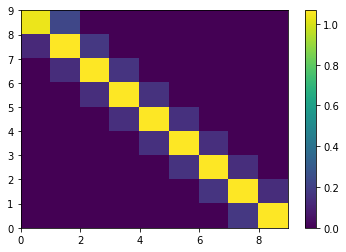

In [100]:
# Fission Matrix Sparsity Pattern
r.fMatPlot()

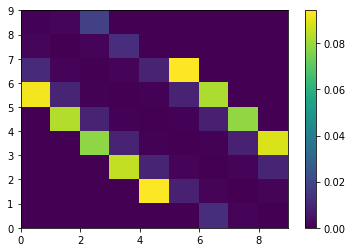

In [101]:
# Uncertainty associated to fission matrix entries
r.fMatUPlot()

## Fission Matrix Spectrum

The function accepts the following additional arguments to customize the plot.

|Option|Description|
|-|-|
|`ax`|Preprepared figure on which to add this plot|
|`linewidth`|Line width|
|`color`|Line color|
|`title`|Title of the plot|
|`xlabel`|Label to apply to x-axis|
|`ylabel`|Label to apply to y-axis|
|`cmap`|Color-map|
|`grid`|Grid (True), no Grid (False)|

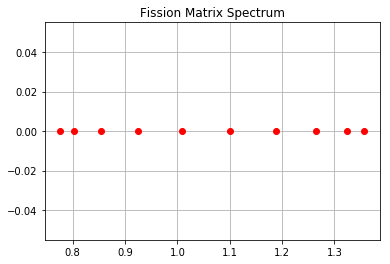

In [102]:
# Plot on the Argand-Gauss plane
r.eigValPlot()

## Eigenmodes Spatial Distribution

The function r.eigVecPlot requires one argument specifying the mode number. The mode number must be in the range $1-N_{max}$, where 1 corresponds to the dominant eigenvalue, and $N_{max}$ to the fission matrix's number of lines/columns. 

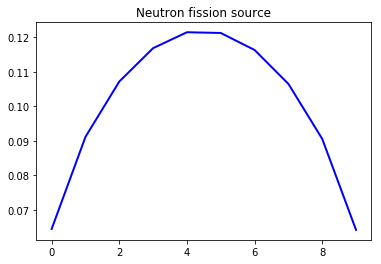

In [103]:
# Plot the n-th eigenmode spatial distribution (dominant eigenmode, n = 1)
r.eigVecPlot(1)

The function accepts the following additional arguments to customize the plot.

|Option|Description|
|-|-|
|`xdata`|Array of data to use as x-axis|
|`ax`|Preprepared figure on which to add this plot|
|`linewidth`|Line width|
|`color`|Line color|
|`title`|Title of the plot|
|`xlabel`|Label to apply to x-axis|
|`ylabel`|Label to apply to y-axis|

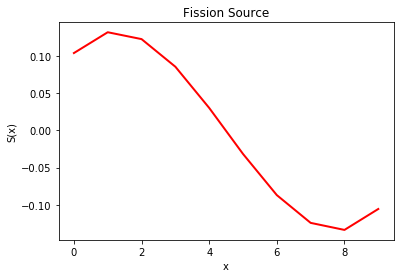

In [104]:
# Example of customization
r.eigVecPlot(2, title='Fission Source', xlabel='x', ylabel='S(x)', color='r', linewidth=2)